# Keidy Almonte

# C4SUE Individual Project 

#### 1. Describe the data, it's structure, data types, formats ETC

The data is a list of evictions, whether it has been executed, is scheduled, or is pending. The data includes evictions from all of the five boroughs frokm January 2017 - present. The data is sorted by Court Index Number, Docket Number, Eviction Address, Apartment Number, Executed Date, Marshal First Name, Marshal Last Name, Residential or Commercial (property type), Borough, Zip Code and Scheduled Status (Pending/Scheduled). The data types included are objects, floats, and integers.


In [24]:
# First step is importing packages

import pandas as pd #<-- we know this one 
import geopandas as gpd
import numpy as np
import matplotlib #<-- for viz
import matplotlib.pyplot as plt#<-- for viz
from datetime import datetime #<-- note this one is for our time series analysis 

In [25]:
# Next I will import the dataset

evictions = pd.read_csv('Evictions.csv')

In [26]:
# I want to visualize the data to answer the first question
evictions.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40492/17,337309,2130 TIEBOUT AVENUE,103/1ST FL,04/23/2018,Thomas,Bia,Residential,BRONX,10457,Not an Ejectment,Possession,40.853575,-73.898475,5.0,15.0,379.0,2013305.0,2.031430e+09,Mount Hope
1,K091444/17,388532,769 ST MARKS AVENUE,3-5E,03/12/2018,Richard,McCoy,Residential,BROOKLYN,11213,Not an Ejectment,Possession,40.675029,-73.946598,8.0,36.0,313.0,3030734.0,3.012210e+09,Crown Heights North
2,064158/18,86100,191-19 JAMAICA AVE,SECOND FLOOR LEFT,08/29/2018,Henry,Daley,Commercial,QUEENS,11423,Not an Ejectment,Possession,40.712604,-73.768501,12.0,23.0,482.0,4000000.0,4.104470e+09,Hollis
3,83867/16-2,6895,546 ISHAM STREET,22A,06/27/2017,George,"Essock, Jr.",Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866936,-73.919009,12.0,10.0,293.0,1064851.0,1.022270e+09,Marble Hill-Inwood
4,085641/18,91267,381 ESSEX STREET,2,09/04/2019,Henry,Daley,Residential,BROOKLYN,11208,Not an Ejectment,Possession,40.674648,-73.881858,5.0,37.0,1166.0,3088972.0,3.040040e+09,East New York


In [27]:
evictions.dtypes

Court Index Number            object
Docket Number                  int64
Eviction Address              object
Eviction Apartment Number     object
Executed Date                 object
Marshal First Name            object
Marshal Last Name             object
Residential/Commercial        object
BOROUGH                       object
Eviction Postcode              int64
Ejectment                     object
Eviction/Legal Possession     object
Latitude                     float64
Longitude                    float64
Community Board              float64
Council District             float64
Census Tract                 float64
BIN                          float64
BBL                          float64
NTA                           object
dtype: object

In [28]:
evictions.shape

(66403, 20)

#### 2. Divide the data into years, describe how evictions trends have changed in each year in the data. What year had the largest number of evictions? Which one had the smallest number of evictions? Discuss your findings and describe what were some of your assumptions?



In [29]:
# changing the data type of the dates

evictions['Executed Date'] = pd.to_datetime(evictions['Executed Date'], format="%m/%d/%Y")

evictions.tail()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
66398,79242/16,291349,162-18 108TH AVE,2,2017-07-24,George,Essock,Residential,QUEENS,11433,Not an Ejectment,Possession,40.696282,-73.791905,12.0,28.0,260.0,4216178.0,4.101500e+09,South Jamaica
66399,23176/18,15438,825 BOYNTON AVENUE,6E,2019-04-30,George,"Essock, Jr.",Residential,BRONX,10473,Not an Ejectment,Possession,40.820139,-73.876260,9.0,17.0,28.0,2092720.0,2.036230e+09,Soundview-Castle Hill-Clason Point-Harding Park
66400,71824/16,4158,2171 CLARENDON ROAD APARTMENT 3,3,2017-01-13,Robert,Renzulli,Residential,BROOKLYN,11226,Not an Ejectment,Possession,40.642722,-73.957264,14.0,40.0,792.0,3396547.0,3.051650e+09,Erasmus
66401,H252047/18,110518,2092-2094 FIFTH AVE,7B,2019-01-23,Darlene,Barone,Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.808739,-73.940577,10.0,9.0,208.0,1053697.0,1.017260e+09,Central Harlem North-Polo Grounds
66402,20496/17,333810,234 EAST GUN HILL ROAD,4G,2019-03-15,Thomas,Bia,Residential,BRONX,10467,Not an Ejectment,Possession,40.880139,-73.876549,7.0,11.0,423.0,2018221.0,2.033430e+09,Norwood


In [30]:
# First split the data by years. 2017 is the start of the dataset so we will only look at the data before 2018. 
# The rest have to be acquired by parsing through the data inbetween two dates

y2017 = evictions[evictions['Executed Date']<'01/01/2018']

y2018 = evictions[(evictions['Executed Date']>'12/31/2017') & (evictions['Executed Date']<'1/1/2019')]

y2019 = evictions[(evictions['Executed Date']>'12/31/2018') & (evictions['Executed Date']<'1/1/2020')]

y2020 = evictions[(evictions['Executed Date']>'12/31/2019') & (evictions['Executed Date']<'1/1/2021')]

y2021 = evictions[(evictions['Executed Date']>'12/31/2020') & (evictions['Executed Date']<'1/1/2022')]

In [31]:
# What year had the largest number of evictions? We will find this out by looking at the shape of each yearly dataset
# This will allow us to see which year has the greatest evictions and which has the least. 

print(y2017.shape)
print(y2018.shape)
print(y2019.shape)
print(y2020.shape)
print(y2021.shape)


(22530, 20)
(21830, 20)
(18647, 20)
(3387, 20)
(8, 20)


As we can see by the data above, the year that has had the largest number of evictions was 2017 and the least amount was 2021, I believe that is due to the start of the year and more has probably been documented since the last update of this csv file. 2017-2019 all seem to have around the same amount of evictions, however, it drops fairly lowly for the year of 2020. I believe this is due to the pandemic and laws around not being able to evict your tenants because of the lack of income. 

#### 3. What is the ratio of commercial to residential evictions in the entire data? Was this ratio constant over time (calculate it separately for each year in the data)? Visualize the data for each year and discuss the trends you found.


In [32]:
# First we will have to find the number of commercial evictions
commercial = evictions[evictions['Residential/Commercial']=='Commercial']
sum_of_com = commercial.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential = evictions[evictions['Residential/Commercial']=='Residential']
sum_of_res = residential.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio = sum_of_com[0]/sum_of_res[0] # take the first number of the tuples, which is the number of columns

print('The ratio is', ratio)



The ratio is 0.09197500411116592


In [33]:
# The code that wouldve worked for 2017

# First we will have to find the number of commercial evictions
commercial17 = y2017[y2017['Residential/Commercial']=='Commercial']
sum_of_com17 = commercial17.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential17 = y2017[y2017['Residential/Commercial']=='Residential']
sum_of_res17 = residential17.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio17 = sum_of_com17[0]/sum_of_res17[0] # take the first number of the tuples, which is the number of columns

print('The ratio for 2017 is', ratio17)

The ratio for 2017 is 0.0826525708793849


In [34]:
# The code that wouldve worked for 2018

# First we will have to find the number of commercial evictions
commercial18 = y2018[y2018['Residential/Commercial']=='Commercial']
sum_of_com18 = commercial18.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential18 = y2018[y2018['Residential/Commercial']=='Residential']
sum_of_res18 = residential18.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio18 = sum_of_com18[0]/sum_of_res18[0] # take the first number of the tuples, which is the number of columns

print('The ratio for 2018 is', ratio18) # this doesnt work because the previous tuple holds a 0 value in place

The ratio for 2018 is 0.09215529317590554


In [35]:
# The code that wouldve worked for 2019

# First we will have to find the number of commercial evictions
commercial19 = y2019[y2019['Residential/Commercial']=='Commercial']
sum_of_com19 = commercial19.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential19 = y2019[y2019['Residential/Commercial']=='Residential']
sum_of_res19 = residential19.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio19 = sum_of_com19[0]/sum_of_res19[0] # take the first number of the tuples, which is the number of columns

print('The ratio for 2019 is', ratio19) # this doesnt work because the previous tuple holds a 0 value in place

The ratio for 2019 is 0.09849779086892489


In [36]:
# The code that wouldve worked for 2020

# First we will have to find the number of commercial evictions
commercial20 = y2020[y2020['Residential/Commercial']=='Commercial']
sum_of_com20 = commercial20.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential20 = y2020[y2020['Residential/Commercial']=='Residential']
sum_of_res20 = residential20.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio20 = sum_of_com20[0]/sum_of_res20[0] # take the first number of the tuples, which is the number of columns

print('The ratio for 2020 is', ratio20) # this doesnt work because the previous tuple holds a 0 value in place

The ratio for 2020 is 0.11598023064250412


In [37]:
# The code that wouldve worked for 2021

# First we will have to find the number of commercial evictions
commercial21 = y2021[y2021['Residential/Commercial']=='Commercial']
sum_of_com21 = commercial21.shape # tuple of columns, rows


# Then we find the number of residential evictions
residential21 = y2021[y2021['Residential/Commercial']=='Residential']
sum_of_res21 = residential21.shape # tuple of columns, rows

# Next we find the ratio of commercial to residential
ratio21 = sum_of_com21[0]/sum_of_res21[0] # take the first number of the tuples, which is the number of columns

print('The ratio for 2021 is', ratio21) # this doesnt work because the previous tuple holds a 0 value in place

The ratio for 2021 is 7.0


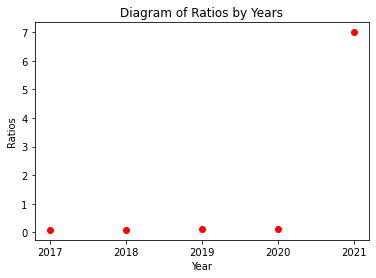

In [38]:
# Visualizing the data would look like:


ratios = [ratio17, ratio18, ratio19, ratio20, ratio21]
years = ['2017', '2018', '2019', '2020', '2021']

plt.plot(years, ratios, 'ro')
plt.title('Diagram of Ratios by Years')

plt.xlabel('Year')
plt.ylabel('Ratios')

plt.show()


The graph shows that 2021 has had the biggest ratio in commercial to residential evictions. This can be explained by the pandemic, which has made many businesses close down in result of the lockdowns and lack of capital being distributed. 

#### 4. What are the full names of the top 5 eviction marshals (those who conducted the largest number of evictions over time)?


In [39]:
# Using value_counts to show us the amount of times the names pop up
first_names = evictions['Marshal First Name'].value_counts()
last_names = evictions['Marshal Last Name'].value_counts()
     
#printing the first and last names    
print(first_names)

print('')

print(last_names)

Justin        9173
Henry         6487
Richard       5893
Ileana        5842
Thomas        5560
Edward        5422
Danny         5350
George        4078
Darlene       3730
Robert        2522
Maxine        1870
Gary          1557
Alfred        1425
Ronald        1337
John           822
Vadim          804
Kenneth        771
Steven         757
Howard         713
Frank          551
Bernard        446
Charles        394
Salavatore     388
Bruce          366
Jeffrey        145
Name: Marshal First Name, dtype: int64

Grossman       9173
Daley          6487
Rivera         5842
Bia            5560
Guida          5422
Weinheim       5350
McCoy          4023
Barone         3730
Essock, Jr.    2661
Renzulli       2404
Chevlowe       1870
Capuano        1870
Rose           1702
Locascio       1425
Essock         1417
Pazant         1337
Villanueva      822
Barbarovich     804
Giachetta       771
Powell          757
Schain          713
Siracusa        551
Blake           446
Marchisotto     394
Gigli

The top 5 Marshals are: Justin Grossman, Henry Daley, Ileana Rivera, Thomas Bia, Edward Guida  
(sidenote: I did not include Richard McCoy because there is a discrepancy with his count)

#### 5. How do 5 boroughs compare overtime in terms of the number of evictions in each? Discuss the findings and compare them to each borough’s population counts.


In [40]:
manhattan = evictions[evictions['BOROUGH']=='MANHATTAN']
print(manhattan.shape)

bronx = evictions[evictions['BOROUGH']=='BRONX']
print(bronx.shape)

brooklyn = evictions[evictions['BOROUGH']=='BROOKLYN']
print(brooklyn.shape)

staten = evictions[evictions['BOROUGH']=='STATEN ISLAND']
print(staten.shape)

queens = evictions[evictions['BOROUGH']=='QUEENS']
print(queens.shape)

(10168, 20)
(22053, 20)
(18832, 20)
(2173, 20)
(13177, 20)


In [53]:
manhattan.head()

,Court Index Number,Docket Number,Eviction Address,Eviction Apartment Number,Executed Date,Marshal First Name,Marshal Last Name,Residential/Commercial,BOROUGH,Eviction Postcode,Ejectment,Eviction/Legal Possession,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
3,83867/16-2,6895,546 ISHAM STREET,22A,2017-06-27,George,"Essock, Jr.",Residential,MANHATTAN,10034,Not an Ejectment,Possession,40.866936,-73.919009,12.0,10.0,293.0,1064851.0,1.022270e+09,Marble Hill-Inwood
6,251576/17,8299,22 EAST 119TH STREET UNIT 317,NaN,2017-10-17,George,"Essock, Jr.",Residential,MANHATTAN,10035,Not an Ejectment,Possession,40.802263,-73.944274,11.0,9.0,184.0,1076434.0,1.017450e+09,East Harlem North
8,60125/19,354561,330 WEST 51ST STREET,120,2019-07-19,Thomas,Bia,Residential,MANHATTAN,10019,Not an Ejectment,Possession,40.763408,-73.986846,4.0,3.0,133.0,1025181.0,1.010410e+09,Clinton
10,12341/19,34369,1830 FIRST AVENUE,20C,2019-07-15,Bruce,Kemp,Residential,MANHATTAN,10128,Not an Ejectment,Eviction,40.782381,-73.945342,8.0,5.0,152.0,1082366.0,1.015730e+09,Yorkville
13,63728/18,2307,246 EAST 23RD ST,NaN,2018-08-13,Salavatore,Giglio,Commercial,MANHATTAN,10010,Not an Ejectment,Possession,40.738372,-73.982080,6.0,2.0,64.0,1019656.0,1.009030e+09,Gramercy


The Bronx has the most evictions, while Staten Island has the least. The Bronx and Brooklyn are fairly close in numbers, I believe because these areas tend to be less gentrified and also these boroughs specifically are fairly big and house lots of people. It is expected of Staten Island to not have as many because it is the smallest borough.

#### 6. Visualize the data as a choropleth map using NTA level, when the different shades represent the number of evictions in a particular NTA. Discuss your findings.


In [52]:
# Load in NTA files
NTA = gpd.read_file("NTA")
NTA.head()

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."
1,3.0,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((-73.94193 40.70073, -73.94439 40.700..."
2,2.0,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((-73.89138 40.86170, -73.89106 40.861..."
3,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
4,3.0,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((-73.90856 40.65210, -73.90945 40.651..."


<AxesSubplot:title={'center':'# of Evictions in NYC sorted by NTAs'}>

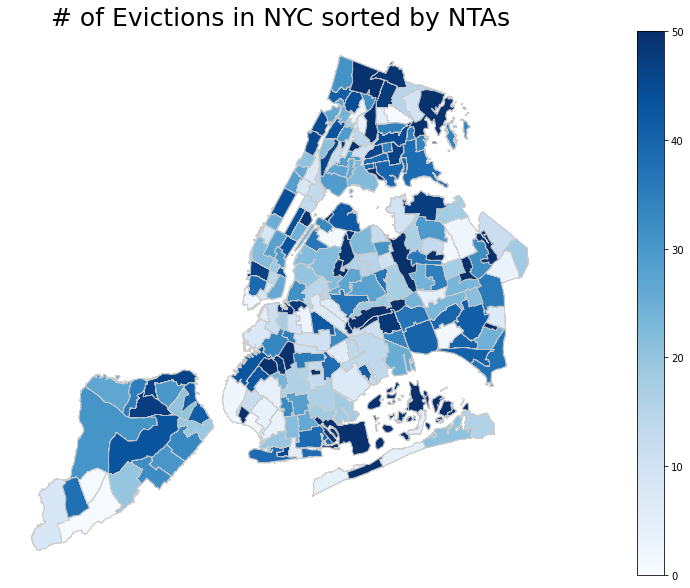

In [71]:
# First going to display the whole NYC map

mergemap = NTA.merge(evictions, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in NYC sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# adding a colorbar
fig.colorbar(sm)

# map
mergemap.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in Manhattan sorted by NTAs'}>

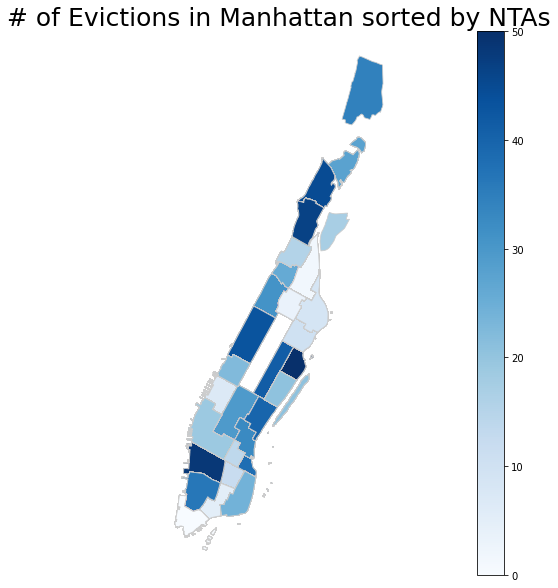

In [65]:
# Displaying each borough on its own

merge_manhattan = NTA.merge(manhattan, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in Manhattan sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# adding a colorbar
fig.colorbar(sm)

# map
merge_manhattan.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in the Bronx sorted by NTAs'}>

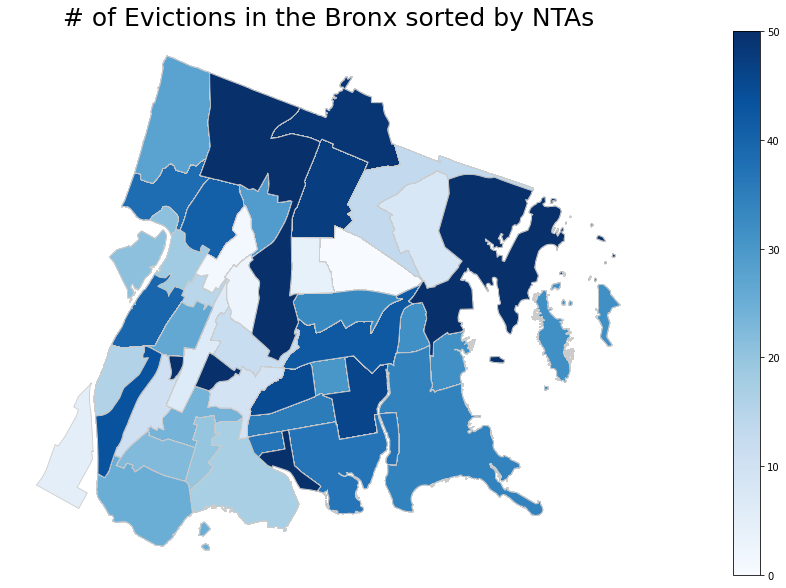

In [66]:
merge_bronx = NTA.merge(bronx, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in the Bronx sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for data range
sm.set_array([])

# adding a colorbar
fig.colorbar(sm)

# map
merge_bronx.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in Brooklyn sorted by NTAs'}>

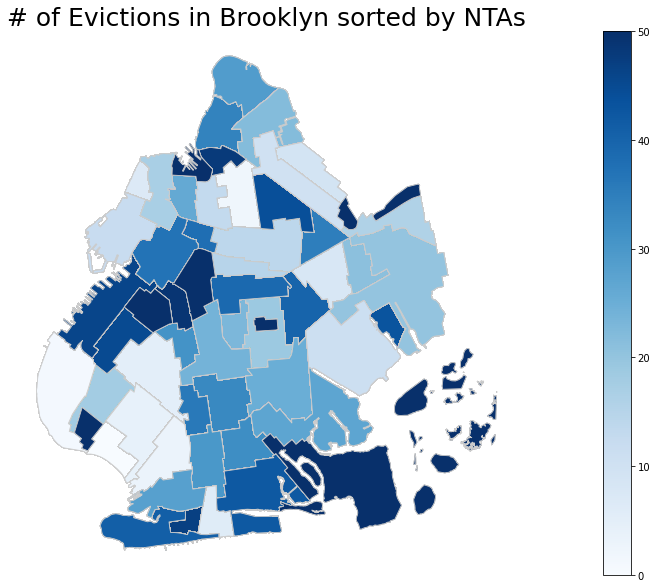

In [67]:
merge_brooklyn = NTA.merge(brooklyn, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in Brooklyn sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for data range
sm.set_array([])

# adding a colorbar
fig.colorbar(sm)

# map
merge_brooklyn.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in Queens sorted by NTAs'}>

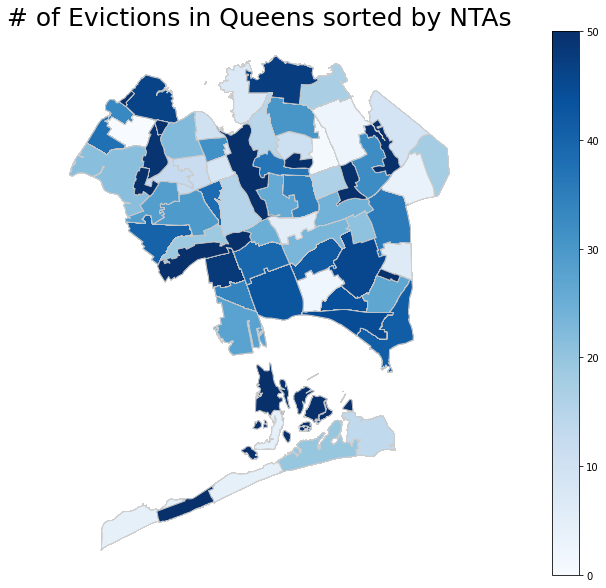

In [69]:
merge_queens = NTA.merge(queens, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in Queens sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for data range
sm.set_array([])

# adding a colorbar
fig.colorbar(sm)

# map
merge_queens.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in Staten Island sorted by NTAs'}>

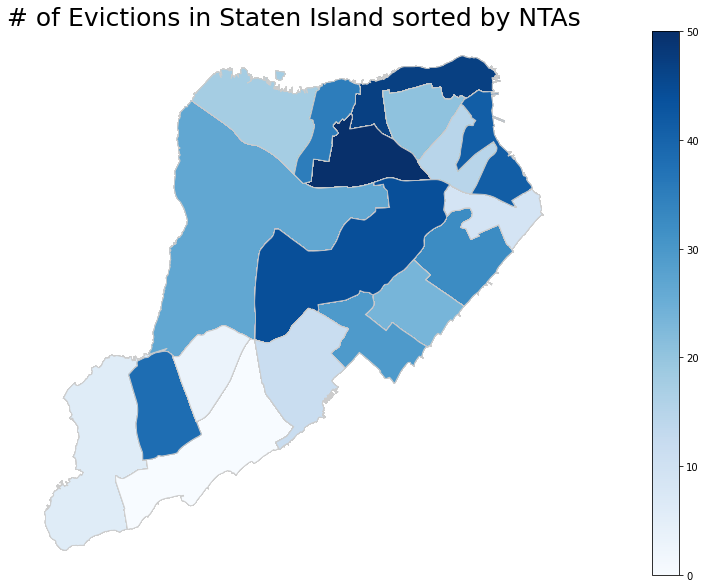

In [70]:
merge_staten = NTA.merge(staten, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in Staten Island sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for data range
sm.set_array([])

# adding a colorbar
fig.colorbar(sm)

# map
merge_staten.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

## Findings:

All of the maps accurately line up with what I had concluded before, which was that the Bronx and Brooklyn had the greater amount of evictions, with the Bronx having the most. Being able to see which NTA had the most evictions can allow me to tie connections between other attributes that might contribute to these evictions in these areas.

#### 7. Can you think of one additional socio-demographic attribute that may affect the number of evictions in a particular neighborhood? Fetch data on that attribute and visualize it side-by-side with evictions or in the same map. Discuss your assumptions and findings as well as possible connections

In [72]:
# Using Census Demographics to view the population in NTA zones

census = pd.read_csv('Census.csv')
census.head()

,Geographic Area - Borough,Geographic Area - 2010 Census FIPS County Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Code,Geographic Area - Neighborhood Tabulation Area (NTA)* Name,Total Population 2000 Number,Total Population 2010 Number,Total Population Change 2000-2010 Number,Total Population Change 2000-2010 Percent
0,Bronx,5.0,BX01,Claremont-Bathgate,28149.0,31078.0,2929.0,10.4
1,Bronx,5.0,BX03,Eastchester-Edenwald-Baychester,35422.0,34517.0,-905.0,-2.6
2,Bronx,5.0,BX05,Bedford Park-Fordham North,55329.0,54415.0,-914.0,-1.7
3,Bronx,5.0,BX06,Belmont,25967.0,27378.0,1411.0,5.4
4,Bronx,5.0,BX07,Bronxdale,34309.0,35538.0,1229.0,3.6


<AxesSubplot:title={'center':'# of Census Demographics in NYC sorted by NTAs'}>

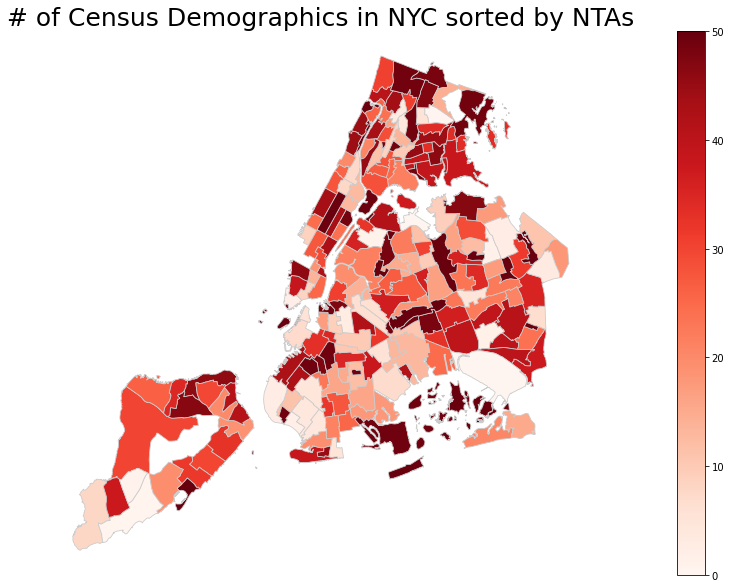

In [74]:
# First going to display the whole NYC map

mergemap1 = NTA.merge(census, how='left', left_on="ntaname", right_on="Geographic Area - Neighborhood Tabulation Area (NTA)* Name")

# set the value column that will be visualised
variable = 'Geographic Area - Neighborhood Tabulation Area (NTA)* Name'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Census Demographics in NYC sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# adding a colorbar
fig.colorbar(sm)

# map
mergemap1.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:title={'center':'# of Evictions in NYC sorted by NTAs'}>

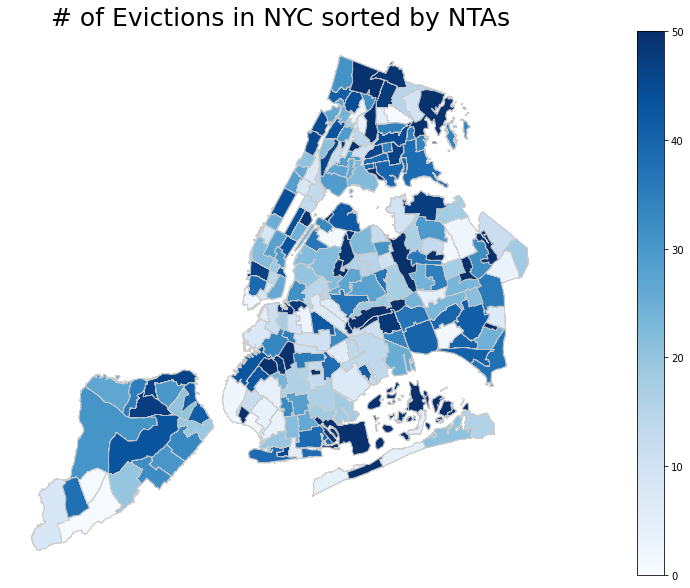

In [76]:
# Display the Evictions Map once again

mergemap = NTA.merge(evictions, how='left', left_on="ntaname", right_on="NTA")

# set the value column that will be visualised
variable = 'NTA'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('# of Evictions in NYC sorted by NTAs', fontdict={'fontsize': '25', 'fontweight' : '3'})

# colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# adding a colorbar
fig.colorbar(sm)

# map
mergemap.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In conclusion, I have found that the evictions in Brooklyn, Queens, and the Bronx match up with the census demographics population. The NTA areas in these three boroughs almost identically match up within both maps, leading me to believe that the higher populated areas within these three boroughs will enable more evictions to take place. These higher populated areas can have a possibility of being project zones, or places where housing programs take place. 